# **Laporan Proyek Machine Learning - Saif Rayhan Naufal**

# **PROJECT OVERVIEW**

Indonesia sebagai negara kepulauan terbesar di dunia memiliki berbagai destinasi wisata yang sangat beragam, mulai dari pantai eksotis, gunung berapi yang menakjubkan, hingga kekayaan budaya yang luar biasa. Menurut data dari Kementerian Pariwisata dan Ekonomi Kreatif Republik Indonesia, sektor pariwisata berkontribusi signifikan terhadap perekonomian nasional dengan sektor ini menyumbang sekitar 3,8% dari Produk Domestik Bruto (PDB) Indonesia pada tahun 2023 [(Kemenparekraf, 2024)](https://www.kemenparekraf.go.id/berita/siaran-pers-kemenparekraf-promosikan-bangga-berwisata-di-indonesia-lewat-diatf-2024). Namun, meskipun memiliki potensi yang besar, industri pariwisata Indonesia masih menghadapi tantangan dalam menarik wisatawan, baik domestik maupun internasional untuk mengeksplorasi destinasi yang ada.

Salah satu tantangan utama adalah bagaimana wisatawan dapat menemukan destinasi yang sesuai dengan preferensi mereka. Banyak wisatawan kesulitan dalam memilih tempat wisata yang sesuai dengan minat pribadi mereka, seperti berdasarkan kategori yang disukai misalnya, wisata alam, budaya, dan sejarah atau berdasarkan faktor seperti wilayah dimana wisata tersebut berada. Selain itu, informasi yang tersebar di berbagai platform tidak selalu terintegrasi dengan baik, sehingga wisatawan sering kali merasa bingung dalam menentukan pilihan. Oleh karena itu, penerapan sistem rekomendasi berbasis teknologi bisa diadaptasi untuk mengatasi kebingungan wisatawan. Sistem rekomendasi yang memanfaatkan machine learning dapat membantu wisatawan menemukan destinasi yang sesuai dengan preferensi mereka secara lebih efektif dan efisien.

# **BUSINESS UNDERSTANDING**

## **Problem Statement**

1. Bagaimana memberikan rekomendasi destinasi wisata berdasarkan karakteristik yang serupa dengan destinasi yang pernah dikunjungi wisatawan?
2. Bagaimana sistem dapat memanfaatkan data rating untuk menghasilkan rekomendasi destinasi wisata yang relevan bagi wisatawan?

## **Goals**

1. Mengembangkan sistem rekomendasi yang dapat menganalisis karakteristik antar destinasi wisata untuk memberikan rekomendasi yang relevan dan sesuai dengan preferensi wisatawan.
2. Memanfaatkan data rating untuk menentukan destinasi wisata sehingga mampu memberikan rekomendasi yang lebih personal dan akurat.

## **Solution Statements**

1. Memanfaatkan algoritma berbasis content-based filtering untuk menemukan destinasi dengan karakteristik yang relevan. Sistem ini memanfaatkan atribut-atribut seperti kategori wisata dan lokasi wisata. Perbandingan dilakukan dengan menggunakan TF-IDF untuk merepresentasikan atribut dalam bentuk vektor numerik, sedangkan kesamaan antar destinasi dihitung menggunakan metode seperti cosine similarity.
2. Memanfaatkan collaborative filtering untuk merekomendasikan destinasi wisata berdasarkan rating yang diberikan oleh pengguna dengan preferensi serupa. Collaborative filtering bertujuan untuk menganalisis pola rating yang diberikan oleh wisatawan agar bisa menemukan hubungan preferensi antara pengguna. Metode ini bekerja dengan mengasumsikan bahwa wisatawan dengan kesukaan serupa cenderung memberikan penilaian yang sama pada destinasi tertentu. Salah satu metrik yang digunakan dalam proses ini adalah Root Mean Squared Error (RMSE) karena dapat mengukur seberapa jauh prediksi yang dihasilkan oleh model dari nilai yang sebenarnya.

# **DATA UNDERSTANDING**

## **Data Loading**

Mengimpor library yang diperlukan

In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

Mengambil dataset yang sebelumnya sudah diunggah ke Google Drive

In [ ]:
file1 = '1t8nUkEtSubcW_q3a025Erw5Y4nlpm-yG'
url1 = f'https://drive.google.com/uc?id={file1}'
df_user = pd.read_csv(url1)

file2 = '1nflmicg9tXkYcai-Q8h61T4GQ9OZQt6x'
url2 = f'https://drive.google.com/uc?id={file2}'
df_place = pd.read_csv(url2)

file3 = '1Rhy-8vbNLR_IIV6NduHbfgQXefL20U1L'
url3 = f'https://drive.google.com/uc?id={file3}'
df_rating = pd.read_csv(url3)

Menampilkan 5 baris data dari masing-masing dataset untuk melihat gambaran data

In [ ]:
# Menampilkan data user
df_user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [ ]:
# Menampilkan data lokasi
df_place.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
# Menampilkan data rating
df_rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


## **Deskripsi Dataset**

Mengecek informasi umum tentang dataset, seperti tipe data dan jumlah nilai non-null dalam setiap kolom dengan fungsi `info()` dan memeriksa ukuran dataset (jumlah baris dan kolom) dengan fungsi `describe()`serta mengecek nilai unik dari masing masing data

### **User**

In [ ]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [ ]:
df_user.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


In [ ]:
print('Jumlah data lokasi pengguna: ', len(df_user.Location.unique()))

Jumlah data lokasi pengguna:  28


### **Place**

In [ ]:
df_place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
df_place.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


In [ ]:
print('Jumlah data tempat wisata: ', len(df_place.Place_Id.unique()), '\n')

print('Jumlah data kota dari tempat wisata: ', len(df_place.City.unique()))
print('Kota lokasi wisata: ', df_place.City.unique(), '\n')

print('Banyak kategori wisata: ', len(df_place.Category.unique()))
print('Kategori wisata: ', df_place.Category.unique())

Jumlah data tempat wisata:  437 

Jumlah data kota dari tempat wisata:  5
Kota lokasi wisata:  ['Jakarta' 'Yogyakarta' 'Bandung' 'Semarang' 'Surabaya'] 

Banyak kategori wisata:  6
Kategori wisata:  ['Budaya' 'Taman Hiburan' 'Cagar Alam' 'Bahari' 'Pusat Perbelanjaan'
 'Tempat Ibadah']


### **Rating**

In [ ]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
df_rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [ ]:
print('Jumlah data pengguna yang memberikan penilaian: ', len(df_rating.User_Id.unique()))
print('Jumlah data tempat yang dinilai: ', len(df_rating.Place_Id.unique()))

Jumlah data pengguna yang memberikan penilaian:  300
Jumlah data tempat yang dinilai:  437


# **DATA PREPARATION**

## **Data Preprocessing**

### **Cek Missing Value**

Sebelumnya sudah dicek bahwa sebagian data sudah lengkap, namun untuk memastikan kembali apakah terdapat misiing value terutama pada variabel yang akan digunakan, maka dilakukan kembali pengecekan missing value dengan fungsi isnull()

In [ ]:
df_user.isnull().sum()

,0
User_Id,0
Location,0
Age,0


In [ ]:
df_place.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [ ]:
df_rating.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


### **Menyamakan Data Tempat Wisata**

In [ ]:
tempat_wisata = df_place.sort_values('Place_Id', ascending=True)
tempat_wisata

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


Mengonversi data series menjadi list

In [ ]:
# Mengonversi data series Place_Id menjadi dalam bentuk list
id_tempat = tempat_wisata['Place_Id'].tolist()

# Mengonversi data series Place_Name menjadi dalam bentuk list
nama_tempat = tempat_wisata['Place_Name'].tolist()

# Mengonversi data series Category menjadi dalam bentuk list
kategori_wisata = tempat_wisata['Category'].tolist()

# Mengonversi data series City menjadi dalam bentuk list
kota_wisata = tempat_wisata['City'].tolist()

print(len(id_tempat))
print(len(nama_tempat))
print(len(kategori_wisata))
print(len(kota_wisata))

437
437
437
437


Membuat dictionary data untuk id_tempat, nama_tempat, kategori_wisata dan kota_wisata

In [ ]:
wisata = pd.DataFrame({
    'id': id_tempat,
    'nama_tempat': nama_tempat,
    'kategori': kategori_wisata,
    'kota': kota_wisata
})
wisata

,id,nama_tempat,kategori,kota
0,1,Monumen Nasional,Budaya,Jakarta
1,2,Kota Tua,Budaya,Jakarta
2,3,Dunia Fantasi,Taman Hiburan,Jakarta
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta
4,5,Atlantis Water Adventure,Taman Hiburan,Jakarta
...,...,...,...,...
432,433,Museum Mpu Tantular,Budaya,Surabaya
433,434,Taman Bungkul,Taman Hiburan,Surabaya
434,435,Taman Air Mancur Menari Kenjeran,Taman Hiburan,Surabaya
435,436,Taman Flora Bratang Surabaya,Taman Hiburan,Surabaya


## **TF-IDF Vectorizer**

Mengubah teks menjadi numerik berbasis fitur (vektor) agar dapat digunakan sebagai input untuk model machine learning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Menggunakan ngram_range=(1, 2) untuk mempertahankan unigram dan bigram
tf = TfidfVectorizer(ngram_range=(1, 2))

# Melakukan perhitungan idf pada data kategori dan kota
tf.fit(wisata['kategori'] + ' ' + wisata['kota'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['alam', 'alam bandung', 'alam jakarta', 'alam semarang',
       'alam surabaya', 'alam yogyakarta', 'bahari', 'bahari jakarta',
       'bahari semarang', 'bahari surabaya', 'bahari yogyakarta',
       'bandung', 'budaya', 'budaya bandung', 'budaya jakarta',
       'budaya semarang', 'budaya surabaya', 'budaya yogyakarta', 'cagar',
       'cagar alam', 'hiburan', 'hiburan bandung', 'hiburan jakarta',
       'hiburan semarang', 'hiburan surabaya', 'hiburan yogyakarta',
       'ibadah', 'ibadah bandung', 'ibadah jakarta', 'ibadah semarang',
       'ibadah surabaya', 'jakarta', 'perbelanjaan',
       'perbelanjaan bandung', 'perbelanjaan jakarta',
       'perbelanjaan surabaya', 'perbelanjaan yogyakarta', 'pusat',
       'pusat perbelanjaan', 'semarang', 'surabaya', 'taman',
       'taman hiburan', 'tempat', 'tempat ibadah', 'yogyakarta'],
      dtype=object)

Melakukan fit lalu ditransformasikan ke bentuk matrix

In [ ]:
tfidf_matrix = tf.fit_transform(wisata['kategori'] + ' ' + wisata['kota'])
tfidf_matrix.shape

(437, 46)

Menghasilkan vektor tf-idf dalam bentuk matriks dengan fungsi `todense()`

In [ ]:
tfidf_matrix_dense = tfidf_matrix.todense()
tfidf_matrix_dense

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.42871242, 0.42871242,
         0.        ]])

Membuat dataframe untuk melihat tf-idf matrix dengan mengisi kolom dengan kategori dan kota sedangkan baris diisi dengan nama tempat

In [ ]:
import pandas as pd
pd.DataFrame(
    tfidf_matrix_dense,
    columns=tf.get_feature_names_out(),
    index=wisata['nama_tempat']
).sample(46, axis=1).sample(10, axis=0)

,jakarta,alam semarang,ibadah surabaya,ibadah,surabaya,hiburan bandung,hiburan jakarta,bahari,alam surabaya,bandung,...,hiburan,cagar alam,tempat,alam,bahari yogyakarta,pusat perbelanjaan,ibadah semarang,taman hiburan,budaya,budaya semarang
nama_tempat,,,,,,,,,,,,,,,,,,,,,
Taman Kupu-Kupu Cihanjuang,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.398746,...,0.000000,0.426254,0.000000,0.426254,0.0,0.0,0.0,0.000000,0.000000,0.0
Gumuk Pasir Parangkusumo,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.388540,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.388540,0.000000,0.0
Sungai Palayangan,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.398746,...,0.000000,0.426254,0.000000,0.426254,0.0,0.0,0.0,0.000000,0.000000,0.0
Curug Dago,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.398746,...,0.000000,0.426254,0.000000,0.426254,0.0,0.0,0.0,0.000000,0.000000,0.0
NuArt Sculpture Park,0.000000,0.0,0.0,0.000000,0.0,0.612274,0.0,0.0,0.0,0.406681,...,0.391463,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.391463,0.000000,0.0
Sunrise Point Cukul,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.398746,...,0.000000,0.426254,0.000000,0.426254,0.0,0.0,0.0,0.000000,0.000000,0.0
Gereja Katedral,0.275006,0.0,0.0,0.436732,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.436732,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
Curug Cipanas,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.398746,...,0.000000,0.426254,0.000000,0.426254,0.0,0.0,0.0,0.000000,0.000000,0.0
Museum Fatahillah,0.526150,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.460763,0.0


## **Membagi Data untuk Training dan Validasi**

Mengecek jumlah data pada dataset rating seperti user dan tempat unik serta mengubah nilai rating menjadi float.

In [ ]:
# Mendapatkan jumlah user dan tempat
num_users = df_rating['User_Id'].nunique()
print('Number of Users: ', num_users)

num_place = df_rating['Place_Id'].nunique()
print('Number of Places: ', num_place)

# Mengubah rating menjadi nilai float
df_rating['Place_Ratings'] = df_rating['Place_Ratings'].values.astype(np.float32)

# Nilai minimum dan maksimal rating
min_rating = min(df_rating['Place_Ratings'])
max_rating = max(df_rating['Place_Ratings'])

print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of Users:  300
Number of Places:  437
Number of User: 300, Number of Place: 437, Min Rating: 1.0, Max Rating: 5.0


Mengacak dataset

In [ ]:
df_rating = df_rating.sample(frac=1, random_state=42)
df_rating

,User_Id,Place_Id,Place_Ratings
6252,188,207,3.0
4684,142,268,2.0
1731,54,103,3.0
4742,144,119,3.0
4521,138,288,5.0
...,...,...,...
5734,173,402,5.0
5191,157,85,4.0
5390,163,18,3.0
860,28,416,4.0


Membagi data train dan validasi dengan komposisi 80:20 dan juga memetakan data user dan tempat menjadi satu value terlebih dahulu serta mengubah rating menjadi skala 0 sampai 1 agar mudah dalam melakukan proses training.

In [ ]:
# Membuat variabel x untuk mencocokkan data user dan place
x = df_rating[['User_Id', 'Place_Id']].values

# Membuat variabel y untuk rating yang sudah dinormalisasi
y = df_rating['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi data menjadi 80% untuk training dan 20% untuk validasi
train_indices = int(0.8 * df_rating.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
# Penyesuaian indeks agar mulai dari 0
x_train[:, 0] -= 1  # Mengurangi 1 pada User_Id
x_train[:, 1] -= 1  # Mengurangi 1 pada Place_Id
x_val[:, 0] -= 1    # Sama untuk data validasi
x_val[:, 1] -= 1

# Memeriksa hasil penyesuaian
print("x_train setelah penyesuaian:\n", x_train)
print("x_val setelah penyesuaian:\n", x_val)
print(x, y)

x_train setelah penyesuaian:
 [[187 206]
 [141 267]
 [ 53 102]
 ...
 [223 168]
 [ 19 135]
 [206  60]]
x_val setelah penyesuaian:
 [[ 13 232]
 [217 237]
 [192 355]
 ...
 [162  17]
 [ 27 415]
 [218 257]]
[[187 206]
 [141 267]
 [ 53 102]
 ...
 [162  17]
 [ 27 415]
 [218 257]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


# **MODELING**

## **Model Development dengan Content Based Filtering**

### **Cosine Similarity**

Menghitung cosine similarity pada matrix tf-idf

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 1.        , 0.23424706, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.23424706, ..., 0.        , 0.        ,
        0.        ],
       [0.23424706, 0.23424706, 1.        , ..., 0.36888361, 0.36888361,
        0.        ],
       ...,
       [0.        , 0.        , 0.36888361, ..., 1.        , 1.        ,
        0.16546807],
       [0.        , 0.        , 0.36888361, ..., 1.        , 1.        ,
        0.16546807],
       [0.        , 0.        , 0.        , ..., 0.16546807, 0.16546807,
        1.        ]])

Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama tempat lalu menampilkan similarity matrix pada setiap tempat



In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=wisata['nama_tempat'], columns=wisata['nama_tempat'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


nama_tempat,Gua Belanda,Surabaya Museum (Gedung Siola),Jembatan Pasupati,Plaza Indonesia,Taman Lalu Lintas Ade Irma Suryani Nasution
nama_tempat,,,,,
Museum Sri Baduga,0.176257,0.182661,0.179765,0.0,0.179765
Kampung Wisata Kadipaten,0.000000,0.191474,0.000000,0.0,0.000000
Pantai Cipta,0.000000,0.000000,0.000000,0.0,0.000000
Waterpark Kenjeran Surabaya,0.000000,0.282023,0.394618,0.0,0.394618
Jogja Exotarium,0.000000,0.000000,0.456298,0.0,0.456298
Curug Cipanas,1.000000,0.000000,0.162163,0.0,0.162163
Plaza Indonesia,0.000000,0.000000,0.000000,1.0,0.000000
Goa Rancang Kencono,0.502016,0.000000,0.000000,0.0,0.000000
Taman Sungai Mudal,0.502016,0.000000,0.000000,0.0,0.000000


### **Mendapatkan Rekomendasi**

Melihat rekomendasi tempat wisata berdasarkan kemiripan dataframe

In [ ]:
def tempat_rekomendasi(nama_tempat, similarity_data=cosine_sim_df, items=wisata[['nama_tempat', 'kategori', 'kota']], k=5):

    index = similarity_data.loc[:,nama_tempat].to_numpy().argpartition(
        range(-1, -k, -1))

    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(nama_tempat, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Menghapus tempat wisata yang akan dicari agar tidak muncul dalam daftar rekomendasi.

In [ ]:
wisata[wisata.nama_tempat.eq('Surabaya North Quay')]

,id,nama_tempat,kategori,kota
404,405,Surabaya North Quay,Taman Hiburan,Surabaya


Menampilkan rekomendasi tempat wisata yang mirip dengan "Surabaya North Quay"

In [ ]:
tempat_rekomendasi('Surabaya North Quay')

,nama_tempat,kategori,kota
0,Taman Keputran,Taman Hiburan,Surabaya
1,Taman Prestasi,Taman Hiburan,Surabaya
2,Taman Buah Surabaya,Taman Hiburan,Surabaya
3,Air Mancur Menari,Taman Hiburan,Surabaya
4,Ciputra Waterpark,Taman Hiburan,Surabaya


## **Model Development dengan Collaborative Filtering**

### **Proses Training**

Membuat class RecommenderNet dengan Keras Model class untuk sistem rekomendasi berbasis embedding matriks

In [ ]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_place, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_place = num_place
        self.embedding_size = embedding_size

        # Layer embedding untuk user
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )

        # Dropout untuk user embedding
        self.user_dropout = layers.Dropout(0.2)  # Dropout dengan rate 20%

        # Bias untuk user
        self.user_bias = layers.Embedding(num_users, 1)

        # Layer embedding untuk place
        self.place_embedding = layers.Embedding(
            num_place,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=keras.regularizers.l2(1e-6)
        )

        # Dropout untuk place embedding
        self.place_dropout = layers.Dropout(0.2)  # Dropout dengan rate 20%

        # Bias untuk place
        self.place_bias = layers.Embedding(num_place, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])  # embedding untuk user
        user_bias = self.user_bias(inputs[:, 0])  # bias untuk user
        place_vector = self.place_embedding(inputs[:, 1])  # embedding untuk place
        place_bias = self.place_bias(inputs[:, 1])  # bias untuk place

        # Menghitung dot product antara user dan place embedding
        dot_user_place = tf.tensordot(user_vector, place_vector, 2)

        # Menambahkan bias
        x = dot_user_place + user_bias + place_bias

        return tf.nn.sigmoid(x) # activation sigmoid

Inisialisasi model dan melakukan proses compile terhadap model

In [ ]:
model = RecommenderNet(num_users, num_place, 10)

# Model compile
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics= [tf.keras.metrics.RootMeanSquaredError()]
)

Melakukan training

In [ ]:
# Memulai training
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=64,
    epochs=100,
    validation_data=(x_val, y_val)
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'recommender_net', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.6968 - root_mean_squared_error: 0.3486 - val_loss: 0.6976 - val_root_mean_squared_error: 0.3483
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6971 - root_mean_squared_error: 0.3473 - val_loss: 0.6976 - val_root_mean_squared_error: 0.3483
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6951 - root_mean_squared_error: 0.3465 - val_loss: 0.6975 - val_root_mean_squared_error: 0.3482
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6947 - root_mean_squared_error: 0.3490 - val_loss: 0.6975 - val_root_mean_squared_error: 0.3482
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6951 - root_mean_squared_error: 0.3465 - val_loss: 0.6975 - val_root_mean_squared_error: 0.3482
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6938 - root_mean_squared_error: 0.3452 - val_loss: 0.6974 - val_root_mean_squared_error: 0.3481
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

### **Mendapatkan Rekomendasi Wisata**

Menggunakan rating ini untuk membuat rekomendasi wisata yang mungkin cocok untuk pengguna

In [ ]:
df_wisata = wisata

# Mengambil sample user
id_user = df_rating.User_Id.sample(1).iloc[0]
place_visited_by_user = df_rating[df_rating.User_Id == id_user]

# Mengidentifikasi tempat yang belum dikunjungi
place_not_visited = df_wisata[~df_wisata['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = np.array(place_not_visited).reshape(-1, 1)

# Membuat array untuk input model
user_place_array = np.hstack(
    (np.full((len(place_not_visited), 1), id_user), place_not_visited)
)

In [ ]:
## Pengurangan Indeks
user_place_array = user_place_array - 1
place_not_visited = place_not_visited - 1

In [ ]:
# Prediksi rating tempat wisata yang belum dikunjungi
ratings = model.predict(user_place_array).flatten()

# Mengambil indeks tempat dengan rating tertinggi
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [place_not_visited[x][0] for x in top_ratings_indices]

# Menampilkan rekomendasi
print(f"Rekomendasi untuk user {id_user}")
print("===" * 9)
print("Tempat yang sudah dikunjungi dengan rating tinggi:")
print("----" * 8)

top_places_user = (
    place_visited_by_user.sort_values(
        by="Place_Ratings", ascending=False
    )
    .head(5)
    .Place_Id.values
)

visited_places = df_wisata[df_wisata['id'].isin(top_places_user)]
for row in visited_places.itertuples():
    print(row.nama_tempat, ":", row.kategori, ":" , row.kota)

print("----" * 8)
print("10 Rekomendasi Tempat Wisata:")
print("----" * 8)

recommended_places = df_wisata[df_wisata['id'].isin(recommended_place_ids)]
for row in recommended_places.itertuples():
    print(row.nama_tempat, ":", row.kategori, ":" , row.kota)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Rekomendasi untuk user 129
Tempat yang sudah dikunjungi dengan rating tinggi:
--------------------------------
Wisata Kraton Jogja : Budaya : Yogyakarta
Museum Nike Ardilla : Budaya : Bandung
Saloka Theme Park : Taman Hiburan : Semarang
Taman Kunang-Kunang : Taman Hiburan : Surabaya
Monumen Tugu Pahlawan : Budaya : Surabaya
--------------------------------
10 Rekomendasi Tempat Wisata:
--------------------------------
Hutan Kota Srengseng : Taman Hiburan : Jakarta
Gembira Loka Zoo : Cagar Alam : Yogyakarta
Alun Alun Selatan Yogyakarta : Taman Hiburan : Yogyakarta
Jurang Tembelan Kanigoro : Taman Hiburan : Yogyakarta
Puncak Kebun Buah Mangunan : Taman Hiburan : Yogyakarta
Pantai Pulang Sawal : Bahari : Yogyakarta
Museum De Javasche Bank : Budaya : Surabaya
Museum Kesehatan Dr. Adhyatma : Budaya : Surabaya
Atlantis Land Surabaya : Taman Hiburan : Surabaya
Taman Flora Bratang Surabaya : Taman Hiburan : Surabaya


# **EVALUATION**

## **Recommender System Precision**

ecommender System Precision adalah metrik evaluasi yang digunakan untuk mengukur seberapa relevan rekomendasi yang diberikan oleh sistem dengan preferensi atau kebutuhan pengguna. Precision mengukur seberapa banyak item yang direkomendasikan benar-benar relevan dibandingkan dengan total item yang direkomendasikan. Semakin tinggi precision, semakin relevan rekomendasi yang diberikan oleh sistem, karena sistem memberikan lebih banyak item yang sesuai dengan preferensi pengguna.

Berdasarkan kasus pada model content based filtering, tujuannya adalah ingin memberikan rekomendasi tempat wisata yang mirip dengan "Surabaya North Quay". Surabaya North Quay dikategorikan ke dalam Taman Hiburan yang ada di Kota Surabaya, sehingga diharapkan rekomendasi yang diberikan adalah tempat dengan kategori Taman Hiburan di Surabaya.

$$\text{Precision} = \frac{\text{Jumlah item relevan yang direkomendasikan}}{\text{Jumlah total item yang direkomendasikan}}$$

$$\text{Precision} = \frac{\text{5}}{\text{5}} = 1$$

Hasil di atas menunjukkan bahwa sistem merokemendasikan tempat wisata secara akurat.

## **Visualisasi Metrik RMSE**

RMSE (Root Mean Squared Error) adalah metrik yang digunakan untuk mengukur seberapa besar perbedaan antara nilai prediksi dan nilai aktual dalam satuan yang sama dengan data asli. Proses perhitungannya melibatkan langkah pertama untuk mengkuadratkan selisih antara nilai prediksi dan nilai sebenarnya, lalu menghitung rata-rata dari hasil kuadrat tersebut, dan akhirnya mengambil akar kuadrat dari rata-rata tersebut. Hasil RMSE yang lebih rendah menunjukkan model yang lebih baik dalam memprediksi dengan akurat, karena kesalahan yang lebih kecil menghasilkan nilai RMSE yang lebih rendah.

Menampilkan visualisasi metrik hasil training

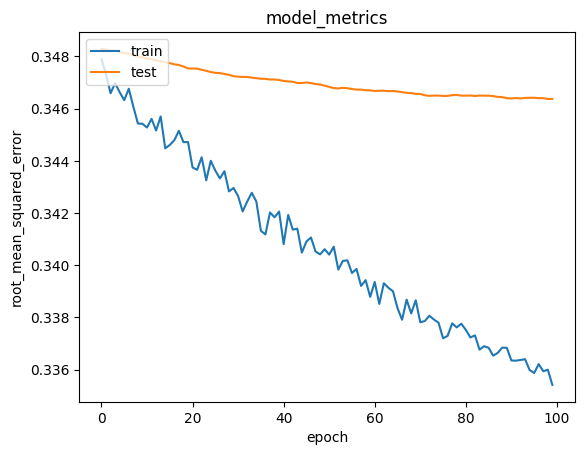

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()